In [315]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [316]:
df = pd.read_csv('tx19_bridges_sample.csv')
df = df.set_index('Structure_id')
df.head()

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200


In [317]:
df['age'] = 2021 - df['Year']
df.head()

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic,age
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1,16
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1,16
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150,9
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120,71
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200,17


In [318]:
df1 = df[['age', 'AverageDaily', 'Trucks_percent', 'Material', 'Design', 'Deck_rating', 'Superstr_rating', 'Substr_rating']].copy()
df1

,age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,16,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,9,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,71,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,17,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
DAPFORHOO000012,27,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000013,21,300,40.0,Concrete,Beam,Good,Good,Good
DAPFORHOO000015,25,1200,25.0,Concrete,Beam,Good,Good,Good


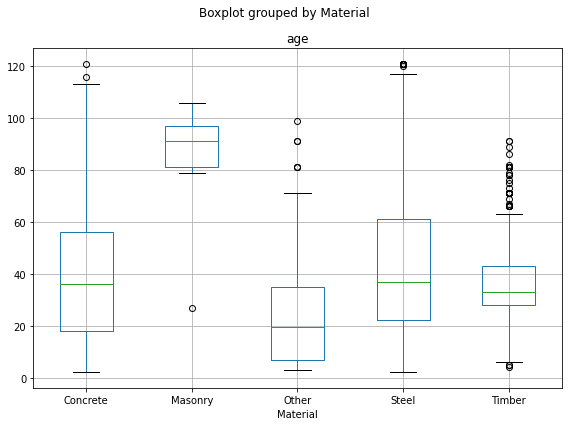

In [319]:
df1.boxplot(column='age', by='Material',figsize=(8,6))
plt.tight_layout()

I am classing masonry bridges as historical bridges as they only seem to be have been produced around 80 or more years ago. I will use a cutoff point of 100 years as this value is just above the 3rd quartile of masonry bridges so they shall be taken into account, but it will eliminate some of the outlying extremely old bridges of 100 and above years of age.

In [346]:
df2 = df1[df1.age <= 100].copy()
df2.head()

,age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
Structure_id,,,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,Good,Very Good,Very Good
000021521-00181,16,1,0.0,Concrete,Slab,Good,Good,Very Good
000021521-TMP20,9,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
000021525-00012,71,80,0.0,Timber,Beam,Good,Good,Poor
000021580-00092,17,150,4.0,Concrete,Beam,Good,Very Good,Very Good


In [321]:
df2.Material.value_counts()

Concrete    27055
Steel        6580
Timber        465
Other          48
Masonry        11
Name: Material, dtype: int64

As both Masonry and Other have very small numbers of bridges, I will combine them into just 'Other_M'. The M is for regression purposes later. I will do the same with Design by appending a 'D' to it's 'Other' value.

In [322]:
df2.Material = df2.Material.apply(lambda x: 'Other_M' if x == 'Other' else ('Other_M' if x == 'Masonry' else x))

In [323]:
df2.Material.value_counts()

Concrete    27055
Steel        6580
Timber        465
Other_M        59
Name: Material, dtype: int64

In [324]:
df2.Design.value_counts()

Beam          28276
Slab           4308
Other          1243
Arch            140
Truss           106
Frame            68
Movable          13
Suspension        5
Name: Design, dtype: int64

As Design has a number of attributes with low numbers I have combined them all into 'Other_D' as well.

In [325]:
df2.Design = df2.Design.apply(lambda x: 'Other_D' if x in ['Other', 'Arch', 'Truss', 'Frame', 'Movable', 'Suspension'] else x)
df2.Design.value_counts()

Beam       28276
Slab        4308
Other_D     1575
Name: Design, dtype: int64

In [326]:
df2.Deck_rating.unique()

array(['Good', 'Very Good', 'Fair', 'Satisfactory', 'Excellent', 'Failed',
       'Poor', nan, 'Failing', 'Serious', 'Critical'], dtype=object)

In [327]:
df2.Superstr_rating.unique()

array(['Very Good', 'Good', 'Fair', 'Satisfactory', 'Failed', 'Poor',
       'Excellent', 'Serious', 'Failing', nan, 'Critical'], dtype=object)

In [328]:
df2.Substr_rating.unique()

array(['Very Good', 'Poor', 'Satisfactory', 'Fair', 'Good', 'Serious',
       'Failed', 'Critical', 'Excellent', 'Failing'], dtype=object)

In [329]:
df2.Deck_rating = df.Deck_rating.apply(lambda x: 0 if x == 'Failed' else 1 if x in ['Critical', 'Serious', 'Failing']
                                     else 2 if x in ['Poor', 'Satisfactory'] else 3 if x in ['Fair', 'Good'] else 4 if x in ['Excellent', 'Very Good'] else x)
df2.Deck_rating = df2.Deck_rating.fillna(0)
df2.Deck_rating.value_counts()

3.0    22193
2.0     7608
4.0     4334
0.0       16
1.0        8
Name: Deck_rating, dtype: int64

In [330]:
df2.Superstr_rating = df.Superstr_rating.apply(lambda x: 0 if x == 'Failed' or x == None else 1 if x in ['Critical', 'Serious', 'Failing']
                                     else 2 if x in ['Poor', 'Satisfactory'] else 3 if x in ['Fair', 'Good'] else 4 if x in ['Excellent', 'Very Good'] else x)
df2.Superstr_rating = df2.Superstr_rating.fillna(0)
df2.Superstr_rating.value_counts()

3.0    16844
2.0     9143
4.0     8130
1.0       25
0.0       17
Name: Superstr_rating, dtype: int64

In [331]:
df2.Substr_rating = df.Substr_rating.apply(lambda x: 0 if x == 'Failed' or x == None else 1 if x in ['Critical', 'Serious', 'Failing']
                                     else 2 if x in ['Poor', 'Satisfactory'] else 3 if x in ['Fair', 'Good'] else 4 if x in ['Excellent', 'Very Good'] else x)
df2.Substr_rating = df2.Substr_rating.fillna(0)
df2.Substr_rating.value_counts()

3    20046
2    11129
4     2889
1       80
0       15
Name: Substr_rating, dtype: int64

I group the ratings and give them a numerical value within Deck_rating, Superstr_rating and Substr_rating. 'Failed' or a nan value = 0 (giving nan a score of 0 may highlight that we are missing data that should be collected, even if the bridge is in good condition). 'Critical, Serious or Failing' = 1, 'Poor, Satisfactory' = 2, 'Fair, Good' = 3 and 'Very Good, Excellent' = 4. This way we now have a continuous variable we can perform regression on.  

In [332]:
df2['Score'] = df2.Deck_rating + df2.Superstr_rating + df2.Substr_rating
df2.head()

,age,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Score
Structure_id,,,,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,3.0,4.0,4,11.0
000021521-00181,16,1,0.0,Concrete,Slab,3.0,3.0,4,10.0
000021521-TMP20,9,100,0.0,Concrete,Beam,4.0,4.0,4,12.0
000021525-00012,71,80,0.0,Timber,Beam,3.0,3.0,2,8.0
000021580-00092,17,150,4.0,Concrete,Beam,3.0,4.0,4,11.0


In [333]:
df3 = df2[['age', 'AverageDaily', 'Trucks_percent', 'Material', 'Design', 'Score']].copy()
df3.head()

,age,AverageDaily,Trucks_percent,Material,Design,Score
Structure_id,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,11.0
000021521-00181,16,1,0.0,Concrete,Slab,10.0
000021521-TMP20,9,100,0.0,Concrete,Beam,12.0
000021525-00012,71,80,0.0,Timber,Beam,8.0
000021580-00092,17,150,4.0,Concrete,Beam,11.0


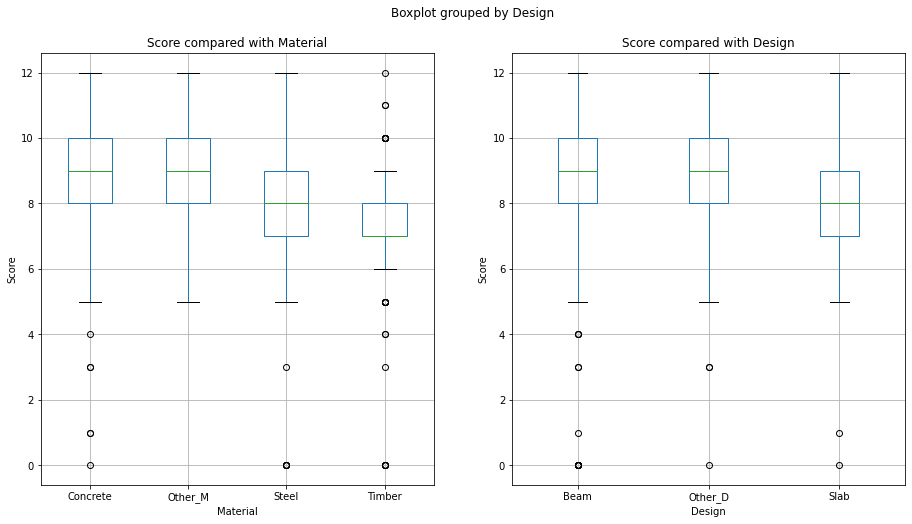

In [334]:
fig, (a1, a2) = plt.subplots(1,2, figsize=(15,8))
a1 = df3.boxplot(column='Score', by='Material', ax=a1)
a1.set_ylabel('Score')
a1.set_title('Score compared with Material')
a2 = df3.boxplot(column='Score', by='Design', ax=a2)
a2.set_ylabel('Score')
a2.set_title('Score compared with Design')
plt.show()

As we can see within the first boxplot comparing score and material we can see that both concrete and other have very similar plots with a median score of 9. However, concrete has a number of outliers lower down with scores of 4 and below. This is likely due to there being far more bridges made from concrete so it is more likely that there are some in worse states. Steel has a similar shape to concrete and other but shifted down to a median of 8 with a couple of outliers at scores of 3 and 0. Timber is the most interesting of them all as its median appears to also be its 1st quartile and is lower than the other materials at 7. It has a far smaller whisker range than the others and a large numbers of outliers both above and below. This is not too surprising when compared to materials such as concrete and steel as timber could be assumed to be less resilient than these materials. \
When score is compared with design is is almost analogous to the material boxplot. Both beam and other designs have very similar plots sharing the same interquartile range with medians based at 9 and a number of outliers below showing bridges in disrepair. Slab designs are almost identical to the other two except it has slipped down to a median of 8 with a couple of outliers and the same IQR. 

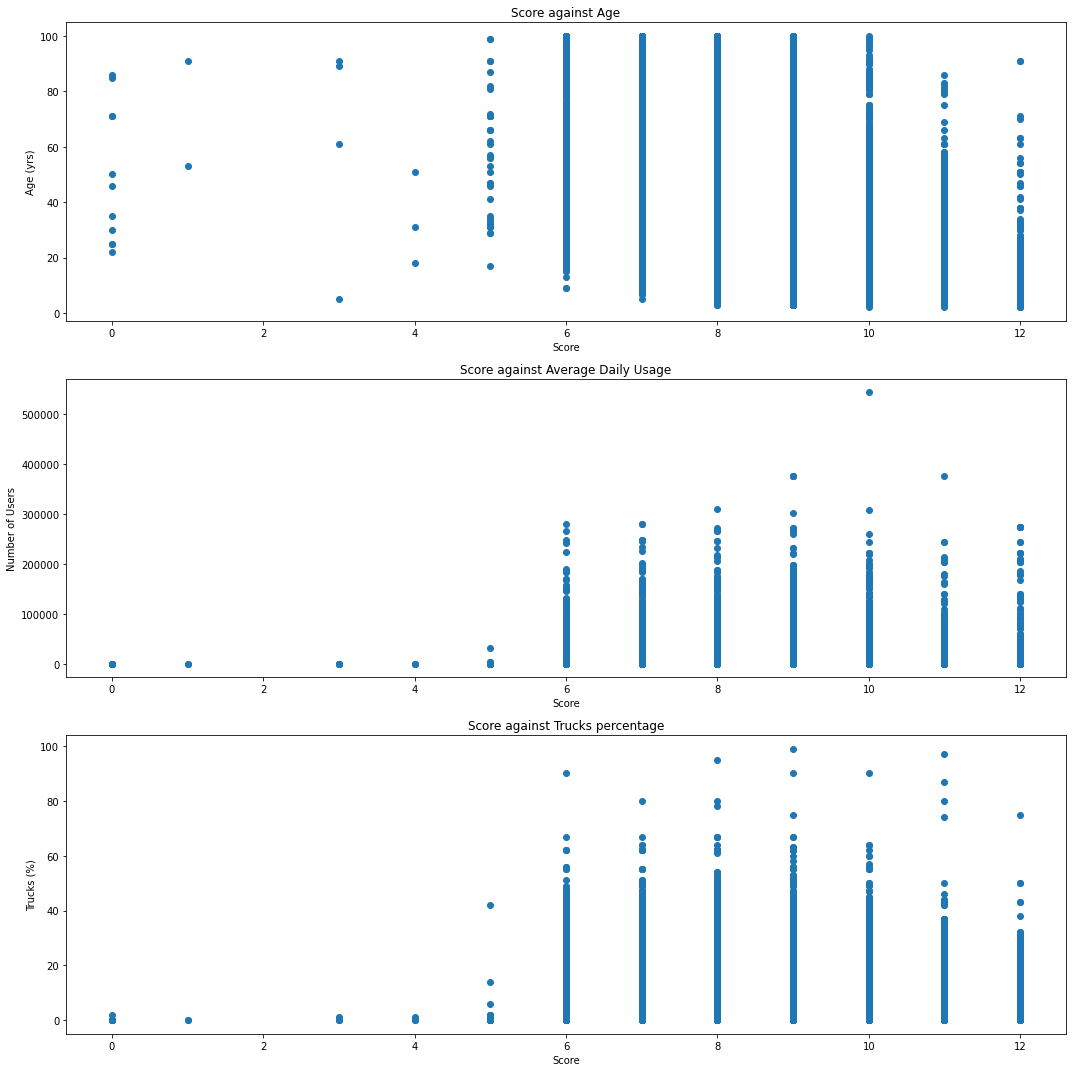

In [335]:
fig, (a1, a2, a3) = plt.subplots(3,1, figsize=(15,15))
a1.scatter(df3.Score, df3.age)
a1.set_title('Score against Age')
a1.set_ylabel('Age (yrs)')
a1.set_xlabel('Score')
a2.scatter(df3.Score, df3.AverageDaily)
a2.set_title('Score against Average Daily Usage')
a2.set_ylabel('Number of Users')
a2.set_xlabel('Score')
a3.scatter(df3.Score, df3.Trucks_percent)
a3.set_title('Score against Trucks percentage')
a3.set_ylabel('Trucks (%)')
a3.set_xlabel('Score')
plt.tight_layout()
plt.show()

In [336]:
material_OHE = pd.get_dummies(df3['Material'])
design_OHE = pd.get_dummies(df3['Design'])

I use One-Hot-Encoding to convert the categorical attributes of both Material and Design into numerical values that can be used in multiple linear regression. This means that we can individually remove each type of material or design to see what effect it has on the bridge's overall score. 

In [342]:
df4 = df3.join([material_OHE, design_OHE]).copy()
df4 = df4.drop(['Material', 'Design'], axis=1)
df4 = df4[['age', 'AverageDaily', 'Trucks_percent', 'Concrete', 'Other_M', 'Steel', 'Timber', 'Beam', 'Other_D', 'Slab', 'Score']]
df4.head()

,age,AverageDaily,Trucks_percent,Concrete,Other_M,Steel,Timber,Beam,Other_D,Slab,Score
Structure_id,,,,,,,,,,,
000021521-00101,16,1,0.0,1,0,0,0,0,0,1,11.0
000021521-00181,16,1,0.0,1,0,0,0,0,0,1,10.0
000021521-TMP20,9,100,0.0,1,0,0,0,1,0,0,12.0
000021525-00012,71,80,0.0,0,0,0,1,1,0,0,8.0
000021580-00092,17,150,4.0,1,0,0,0,1,0,0,11.0


In [338]:
x = df4[['age', 'AverageDaily', 'Trucks_percent', 'Concrete', 'Other_M', 'Steel', 'Timber', 'Beam', 'Other_D', 'Slab',]]
y = df4['Score']

In [339]:
lr = LinearRegression()
model = lr.fit(x,y)
print(model.coef_)

[-3.58611262e-02 -1.45879571e-06  1.78181799e-03  5.61258527e-01
  7.04608301e-01 -4.04379359e-01 -8.61487468e-01 -5.55855335e-02
  1.85836671e-01 -1.30251137e-01]


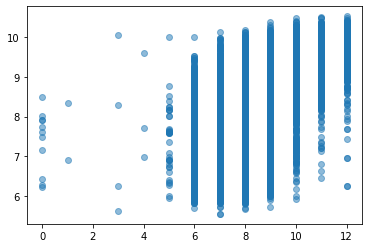

In [340]:
y_predict = lr.predict(x)
plt.scatter(y, y_predict, alpha=0.5)
plt.show()

In [341]:
lr.score(x,y)

0.4179314001876089